Install dependencies

In [9]:
!pip install gym

In [10]:
!git clone https://github.com/JKCooper2/gym-bandits.git
!pip install /content/gym-bandits/.

fatal: destination path 'gym-bandits' already exists and is not an empty directory.
Processing ./gym-bandits
  Preparing metadata (setup.py) ... done
  Created wheel for gym-bandits: filename=gym_bandits-0.0.2-py3-none-any.whl size=5176 sha256=b1894f351e656f20dd62e12394c5356360c602ba80fe1998278ba586c4a6338b
  Stored in directory: /root/.cache/pip/wheels/c3/08/26/864a6d1117e7bfa76123a5bde6db05037a94b056b2f6ee5f5c
Successfully built gym-bandits
  Attempting uninstall: gym-bandits
    Found existing installation: gym-bandits 0.0.2
    Uninstalling gym-bandits-0.0.2:
      Successfully uninstalled gym-bandits-0.0.2


In [11]:
import gym
import gym_bandits
import numpy as np
import pandas as pd
import seaborn as sns

np.set_printoptions(precision=3)

## Auxiliary functions

In [12]:
def execute(environment, n_ep, n_a, policy):

  rewards = np.zeros(shape=(n_ep, n_a))
  pulls = np.ones(n_a)

  environment.reset()
  env.seed(42)
  np.random.seed(42)

  print("Pull Probability per arm: " + str(env.p_dist))
  print("Reward probability per arm: " + str(env.r_dist))

  if policy == "ucb":
    for a in range(n_a):
      _, reward, _, _ = environment.step(a)
      rewards[0,a] = reward

  for episode in range(n_ep):

      if policy == "greedy":
        action = greedy(rewards, pulls)
      elif policy == "e_greedy":
        action = e_greedy(rewards, pulls)
      elif policy == "random":
        action = random_policy()
      elif policy == "ucb":
        action = ucb(rewards, pulls, episode)
      elif policy == "thompson_sampling":
        action = thompson_sampling(rewards, pulls, episode)

      pulls[action] = pulls[action] + 1

      observation, reward, done, info = environment.step(action)  # execute new step

      rewards[episode, action] = reward # update rewards

  environment.close()

  print("Return: " + str(np.sum(rewards)))
  return rewards

In [13]:
def plot_cumulative_rewards(rew):
  bandits = ["Arm-" + str(i) for i in range(rew.shape[1])]

  rewards_df = pd.DataFrame(rew, columns=bandits)
  rewards_df["Episode"] = range(n_episodes)

  rewards_melted = pd.melt(rewards_df,
                          id_vars=["Episode"],
                          var_name="Arm",
                          value_vars=bandits,
                          value_name="reward")

  rewards_melted['cumulative_reward'] = rewards_melted.groupby('Arm')["reward"].transform('cumsum')

  sns.lineplot(data=rewards_melted, x='Episode', y='cumulative_reward', hue='Arm')

## Repeat the exercise for examples with 10 bandits

*    BanditTenArmedRandomFixed - 10 armed bandit with random probabilities assigned to payouts
*    BanditTenArmedUniformDistributedReward - 10 armed bandit with that always pays out with a reward selected from a uniform distribution
*    BanditTenArmedRandomRandom - 10 armed bandit with random probabilities assigned to both payouts and rewards
*    BanditTenArmedGaussian - 10 armed bandit where actions always pay out.

      Mean of payout is pulled from a normal distribution (0, 1) (called q*(a))

      Actual reward is drawn from a normal distribution (q*(a), 1)


```python
# p_dist:
#     A list of probabilities of the likelihood that a particular bandit will pay out
# r_dist:
#     A list of either rewards (if number) or means and standard deviations (if list)
#     of the payout that bandit has


class BanditTenArmedRandomFixed(BanditEnv):
    """10 armed bandit with random probabilities assigned to payouts"""
    def __init__(self, bandits=10):
        p_dist = np.random.uniform(size=bandits)
        r_dist = np.full(bandits, 1)
        BanditEnv.__init__(self, p_dist=p_dist, r_dist=r_dist)


class BanditTenArmedUniformDistributedReward(BanditEnv):
    """10 armed bandit with that always pays out with a reward selected from a uniform distribution"""
    def __init__(self, bandits=10):
        p_dist = np.full(bandits, 1)
        r_dist = np.random.uniform(size=bandits)
        BanditEnv.__init__(self, p_dist=p_dist, r_dist=r_dist)


class BanditTenArmedRandomRandom(BanditEnv):
    """10 armed bandit with random probabilities assigned to both payouts and rewards"""
    def __init__(self, bandits=10):
        p_dist = np.random.uniform(size=bandits)
        r_dist = np.random.uniform(size=bandits)
        BanditEnv.__init__(self, p_dist=p_dist, r_dist=r_dist)


class BanditTenArmedGaussian(BanditEnv):
    """
    10 armed bandit mentioned on page 30 of Sutton and Barto's
    [Reinforcement Learning: An Introduction](https://www.dropbox.com/s/b3psxv2r0ccmf80/book2015oct.pdf?dl=0)

    Actions always pay out
    Mean of payout is pulled from a normal distribution (0, 1) (called q*(a))
    Actual reward is drawn from a normal distribution (q*(a), 1)
    """
    def __init__(self, bandits=10):
        p_dist = np.full(bandits, 1)
        r_dist = []

        for _ in range(bandits):
            r_dist.append([np.random.normal(0, 1), 1])

        BanditEnv.__init__(self, p_dist=p_dist, r_dist=r_dist)

```

In [14]:
env = gym.make('BanditTenArmedRandomFixed-v0')
# env = gym.make('BanditTenArmedUniformDistributedReward-v0')
# env = gym.make('BanditTenArmedRandomRandom-v0')
# env = gym.make('BanditTenArmedGaussian-v0')

n_arms = 10
n_episodes = 200


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [15]:
# IMPLEMENT MISSING POLICIES

def random_policy():
  return 0

def greedy(rew, pul):
  return 0

def e_greedy(rew, pul):
  return 0

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(

Pull Probability per arm: [0.375 0.951 0.732 0.599 0.156 0.156 0.058 0.866 0.601 0.708]
Reward probability per arm: [1 1 1 1 1 1 1 1 1 1]
Return: 87.0


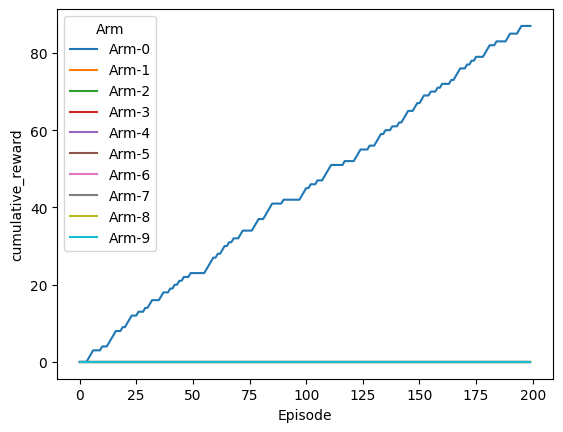

In [16]:
plot_cumulative_rewards(execute(env, n_episodes, n_arms, "random"))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


Pull Probability per arm: [0.375 0.951 0.732 0.599 0.156 0.156 0.058 0.866 0.601 0.708]
Reward probability per arm: [1 1 1 1 1 1 1 1 1 1]
Return: 87.0


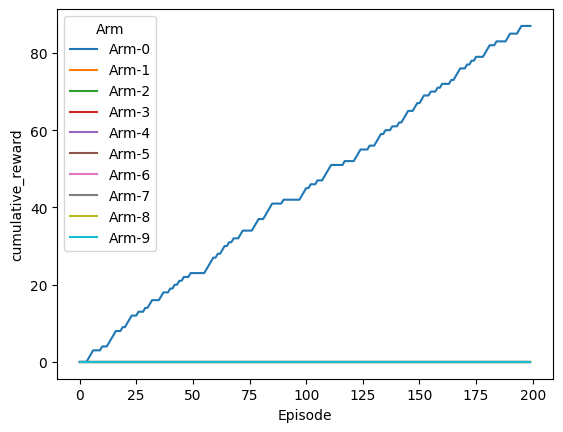

In [17]:
plot_cumulative_rewards(execute(env, n_episodes, n_arms, "greedy"))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


Pull Probability per arm: [0.375 0.951 0.732 0.599 0.156 0.156 0.058 0.866 0.601 0.708]
Reward probability per arm: [1 1 1 1 1 1 1 1 1 1]
Return: 87.0


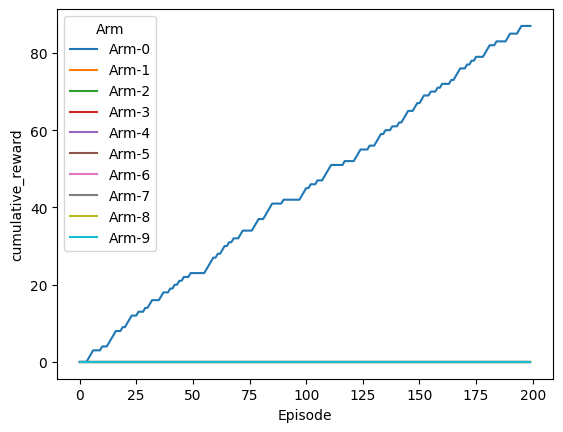

In [18]:
plot_cumulative_rewards(execute(env, n_episodes, n_arms, "e_greedy"))

Create your own policy - UCB

In [21]:
def ucb(rew, pul, ep):
  return 0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


Pull Probability per arm: [0.375 0.951 0.732 0.599 0.156 0.156 0.058 0.866 0.601 0.708]
Reward probability per arm: [1 1 1 1 1 1 1 1 1 1]
Return: 90.0


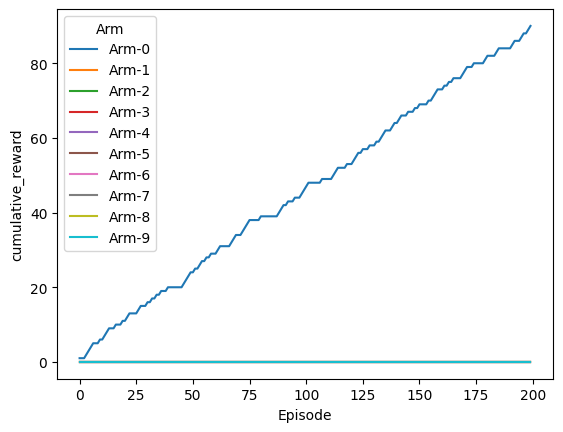

In [22]:
plot_cumulative_rewards(execute(env, n_episodes, n_arms, "ucb"))

Create your own policy - Thompson Sampling

In [23]:
def thompson_sampling(rew, pul, ep):
  return 0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


Pull Probability per arm: [0.375 0.951 0.732 0.599 0.156 0.156 0.058 0.866 0.601 0.708]
Reward probability per arm: [1 1 1 1 1 1 1 1 1 1]
Return: 87.0


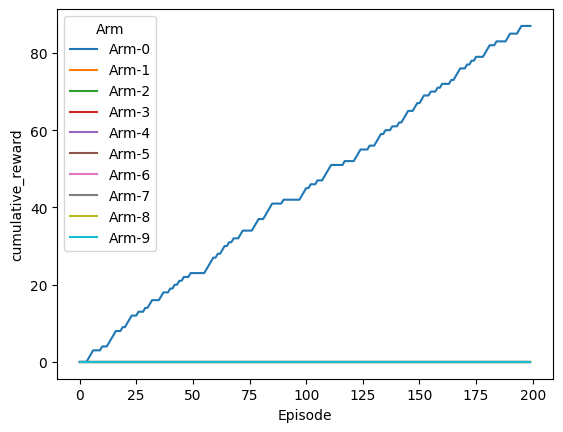

In [24]:
plot_cumulative_rewards(execute(env, n_episodes, n_arms, "thompson_sampling"))